# Multi-computation with boundary field change

**Champ_front_parametrique** boundary field for chaining different scenarios in a single *datafile*.
Two stationary then one transitory computation are run and compared to independent computations reading the previous computation save.
Each computation is run into a **dedicated directory** named calcul# with **time reset to 0**.

Pierre LEDAC with TRUST 1.9.4

In [ ]:
from trustutils import run 
import os
jdd="cfp"
cases=[
    (jdd, "champ_front_parametrique", "Champ_Uniforme 2 0. 0.", "champ_front_parametrique { fichier champ_front.txt }"),
    ("calcul1", "stationary 1",       "Champ_Uniforme 2 0. 0.", "champ_front_uniforme 2 1.0 0.0"),
    ("calcul2", "stationary 2",       "Champ_fonc_reprise binaire ../calcul1/calcul1_pb.sauv pb vitesse last_time", "champ_front_uniforme 2 2.0 0.0"),
    ("calcul3", "transient",          "Champ_fonc_reprise binaire ../calcul2/calcul2_pb.sauv pb vitesse last_time", "champ_front_tabule 2 { 3   0.0 1.0 2.0   2.0 0.0  1.99 0.0  1.0 0.0 }")
]
#    
run.reset()
run.initCaseSuite()
run.executeCommand("echo { > champ_front.txt")
separateur=""
# Create test case:
for case,label,init,champ in cases:
    if label=="champ_front_parametrique":
       rep="."
    else:
       rep=case
       # Build champ_front.txt file containing the list of boundary fields:
       run.executeCommand("echo -e %s %s >> champ_front.txt" % (separateur, champ), verbose=False)
       separateur=","
    run.executeCommand("rep=%s;case=%s;mkdir -p $rep;cp base.data $rep/$case.data;cp verifie $rep/post_run" % (rep,case), verbose=False)
    cas = run.addCase(rep ,"%s.data" % case) 
    cas.substitute("_init_",init)
    cas.substitute("_champ_",champ)

run.executeCommand("echo } >> champ_front.txt")
run.printCases()
run.runCases()

### Test cases 
* ./cfp.data 
* calcul1/calcul1.data 
* calcul2/calcul2.data 
* calcul3/calcul3.data 


Running ...
  => A total of 4 cases were (successfully) run in 2.9s.


## Check results
### The computation (single or multi) for outlet should match

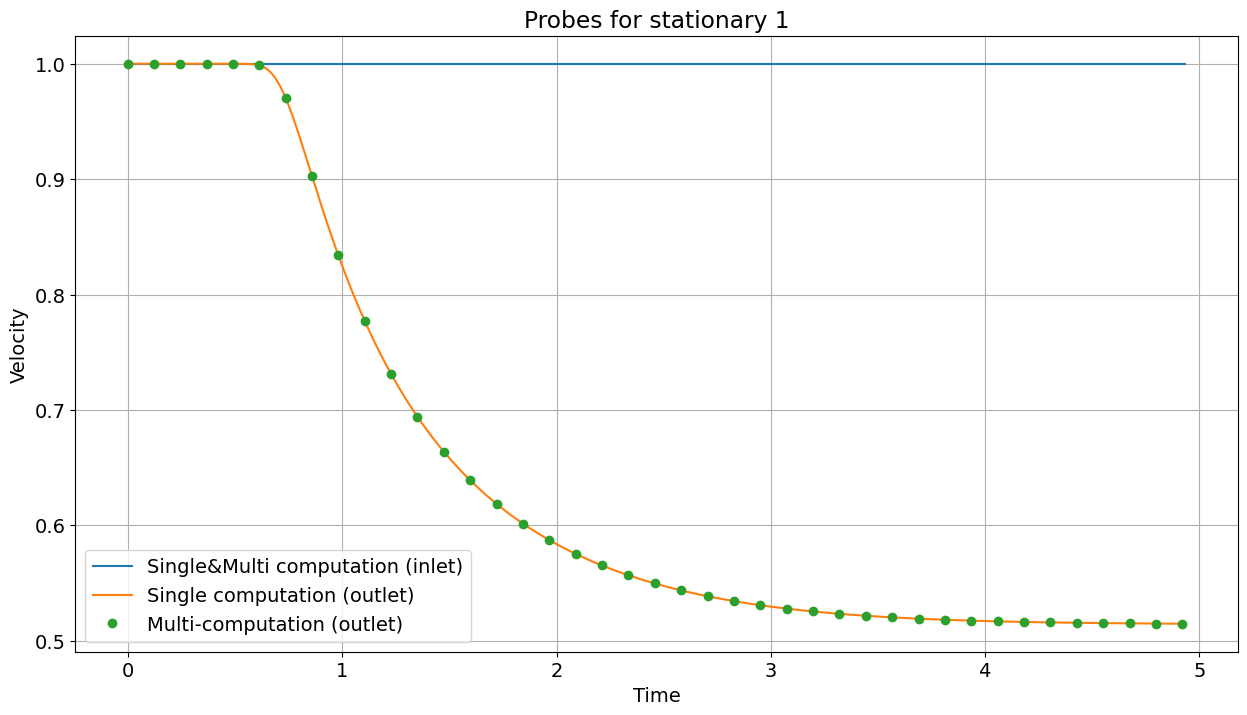

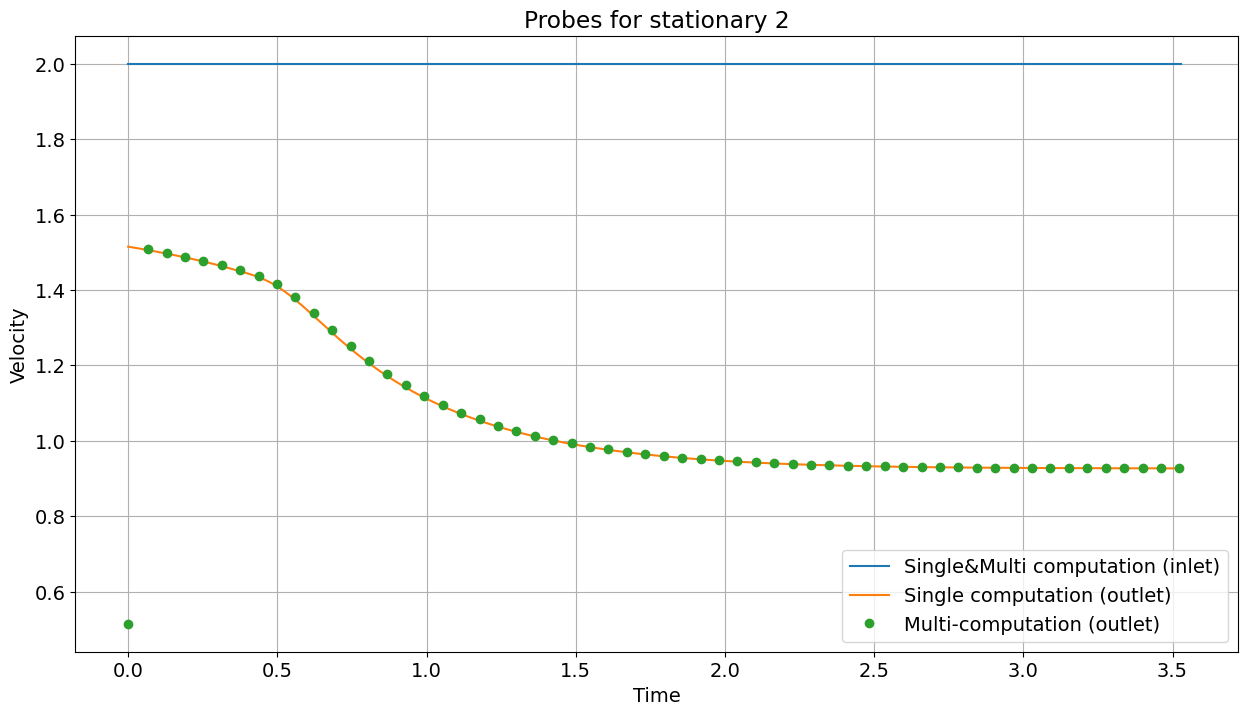

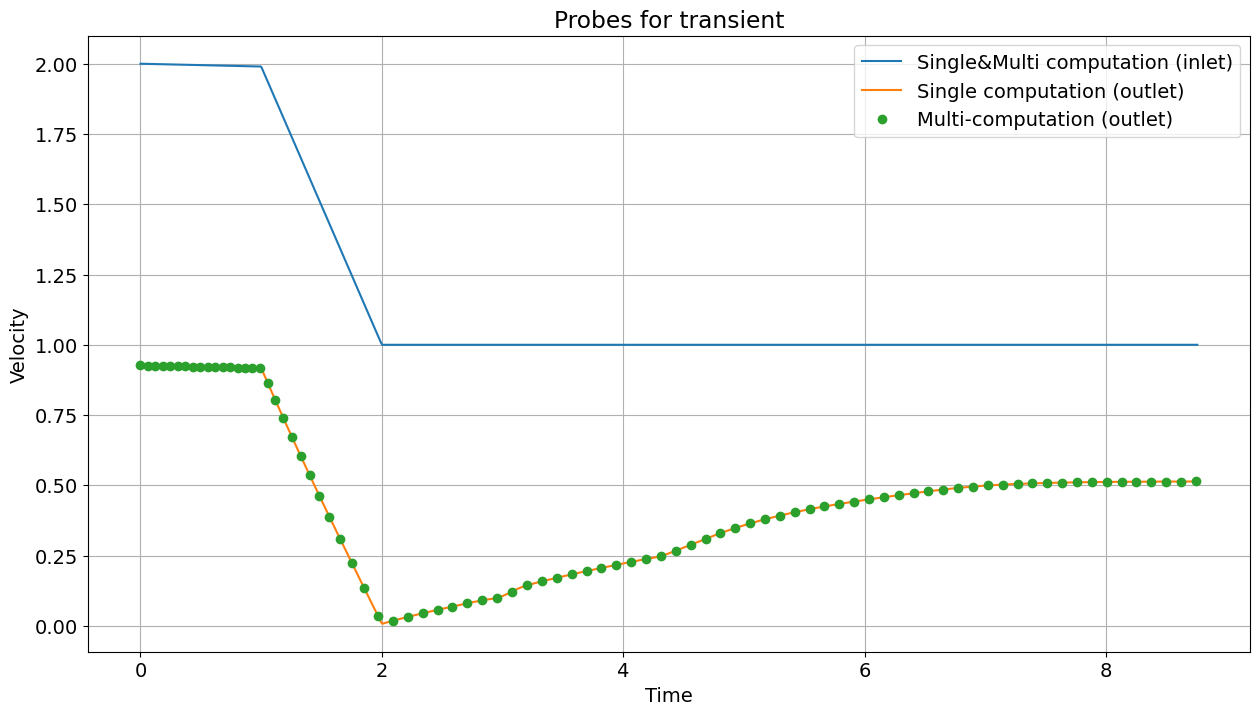

In [ ]:
from trustutils import plot 
import numpy as np
import matplotlib.pyplot as plt 
jdd="cfp"
for case,label,init,champ in cases:
    if label!="champ_front_parametrique":
        a=plot.Graph("Probes for %s" % label,size=[15,8])
        a.addPoint("%s/%s_IN.son"   % (case,case), marker='-', label="Single&Multi computation (inlet)" )
        a.addPoint("%s/%s_OUT.son"  % (case,case), marker='-', label="Single computation (outlet)")
        a.addPoint("%s/%s_OUT.son"  % (case,jdd) , marker='o', markevery=10, label="Multi-computation (outlet)")
        a.label("Time","Velocity")